In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
loan = pd.read_csv('C:\\Users\\Araba\\Desktop\\blossom1\\loan_sample (1).csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,22000,22000,22000.0,36 months,9.17,701.34,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8000,8000,8000.0,36 months,5.32,240.92,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,6000,6000,6000.0,36 months,9.75,192.90,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5300,5300,5300.0,36 months,12.39,177.03,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000,8000,8000.0,36 months,12.49,267.60,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391091 entries, 0 to 391090
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(5), object(35)
memory usage: 432.6+ MB


In [7]:
loan.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object

In [8]:
loan.shape

(391091, 145)

In [9]:
loan.isna().mean()

id                       1.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
                           ...   
settlement_status        0.975474
settlement_date          0.975474
settlement_amount        0.975474
settlement_percentage    0.975474
settlement_term          0.975474
Length: 145, dtype: float64

### Dropping columns with 80% NaN

In [11]:
#axis=1 specifies column, inplace=True overwrites loan
loan.dropna(thresh=(loan.shape[0] * 0.8), axis=1, inplace=True) 

In [12]:
# we can now see how many columns have been thrashed
loan.shape

(391091, 87)

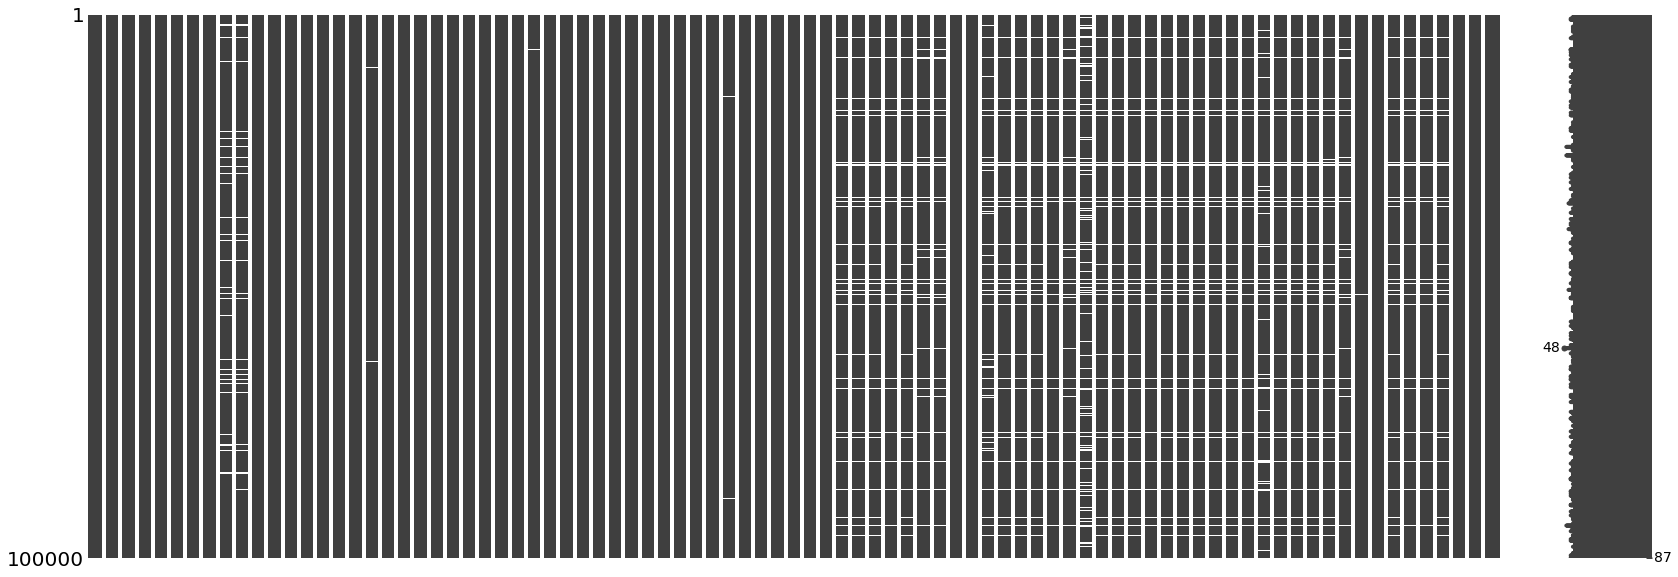

In [13]:
# visualizing the missingness partern
msno.matrix(loan[0:100000])

In [14]:
loan.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [15]:
int_loan = loan.select_dtypes(include=['float64','int64'])

In [16]:
int_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,22000,22000,22000.0,9.17,701.34,73000.0,0,13.16,0.0,2.0,...,0.0,2.0,90.9,50.0,0.0,0.0,56900.0,33797.0,47600.0,0.0
1,8000,8000,8000.0,5.32,240.92,89000.0,0,6.63,0.0,0.0,...,0.0,1.0,100.0,0.0,1.0,0.0,236146.0,17380.0,10500.0,18039.0
2,6000,6000,6000.0,9.75,192.90,65000.0,0,24.26,0.0,0.0,...,0.0,2.0,100.0,33.3,0.0,0.0,89841.0,41070.0,16000.0,32641.0
3,5300,5300,5300.0,12.39,177.03,53486.0,0,32.87,0.0,0.0,...,0.0,2.0,100.0,50.0,0.0,0.0,233175.0,42735.0,17300.0,22828.0
4,8000,8000,8000.0,12.49,267.60,72550.0,0,10.72,0.0,0.0,...,0.0,1.0,60.0,100.0,0.0,0.0,211884.0,8147.0,6200.0,17684.0


In [17]:
np.absolute(int_loan.corr()[['loan_status']]).sort_values(by='loan_status')[35:]

,loan_status
total_rec_int,0.056074
mths_since_recent_inq,0.057126
total_rev_hi_lim,0.058353
revol_util,0.060663
inq_last_6mths,0.064318
funded_amnt_inv,0.065160
loan_amnt,0.065280
funded_amnt,0.065349
bc_util,0.067065
percent_bc_gt_75,0.068538


In [18]:
np.absolute(int_loan.corr()[['loan_status']]).sort_values(by='loan_status')[35:].index

Index(['total_rec_int', 'mths_since_recent_inq', 'total_rev_hi_lim',
       'revol_util', 'inq_last_6mths', 'funded_amnt_inv', 'loan_amnt',
       'funded_amnt', 'bc_util', 'percent_bc_gt_75', 'num_rev_tl_bal_gt_0',
       'num_actv_rev_tl', 'tot_cur_bal', 'total_bc_limit', 'mort_acc',
       'tot_hi_cred_lim', 'avg_cur_bal', 'bc_open_to_buy',
       'num_tl_op_past_12m', 'dti', 'acc_open_past_24mths',
       'total_rec_late_fee', 'int_rate', 'total_pymnt_inv', 'total_pymnt',
       'last_pymnt_amnt', 'total_rec_prncp', 'collection_recovery_fee',
       'recoveries', 'loan_status', 'policy_code'],
      dtype='object')

In [20]:
cat_loan = loan.select_dtypes(include=['O'])
cat_loan.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,B,B2,Registered Nurse,5 years,RENT,Source Verified,Jun-2015,n,debt_consolidation,...,913xx,CA,Sep-1999,f,Jun-2018,Feb-2019,Individual,N,Cash,N
1,36 months,A,A1,Foreman,10+ years,MORTGAGE,Not Verified,Aug-2016,n,debt_consolidation,...,740xx,OK,Dec-2001,f,Aug-2018,Feb-2019,Individual,N,Cash,N
2,36 months,B,B3,Staff Accountant,1 year,RENT,Not Verified,Mar-2016,n,debt_consolidation,...,980xx,WA,Oct-2004,w,May-2017,Feb-2019,Individual,N,Cash,N
3,36 months,C,C1,ADMINISTRATOR,10+ years,MORTGAGE,Source Verified,Nov-2014,n,debt_consolidation,...,150xx,PA,Jun-1991,w,Nov-2017,Aug-2018,Individual,N,Cash,N
4,36 months,B,B5,Chemistry Supervisor,10+ years,MORTGAGE,Not Verified,Sep-2014,n,other,...,441xx,OH,Jul-1979,w,Sep-2017,Feb-2019,Individual,N,Cash,N


In [21]:
cat_loan.shape

(391091, 21)

In [22]:
cat_loan.grade.unique()

array(['B', 'A', 'C', 'D', 'E', 'G', 'F'], dtype=object)

In [23]:
cat_loan.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [24]:
# Encoding grade as a predictor variable
encode = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,'G': 7}
cat_loan['grade'].replace(encode, inplace=True)

# adding encoded grade feature to int_loan dataframe for modeling
int_loan['grade'] = cat_loan['grade'].copy()

## Modeling with continuous predictor variables

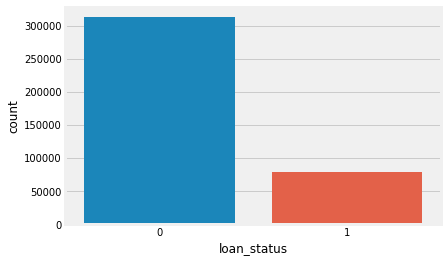

In [26]:
# plotting the distribution of the target variable
sns.countplot(loan['loan_status'])

In [28]:
# filling missing values with IterativeImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=1, verbose=0)
imputed_loan = imp.fit_transform(int_loan)
int_loan = pd.DataFrame(imputed_loan, columns=int_loan.columns)

In [29]:
int_loan['loan_status'] = loan['loan_status'].copy()

In [30]:
# finding the sum of null values in the loan after Iterative imputation
int_loan.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
                             ..
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
grade                         0
Length: 67, dtype: int64

## Model Feature Selection 

In [31]:
X_test_loan = int_loan[['total_rec_late_fee', 'int_rate', 'total_pymnt_inv', 'total_pymnt', 'grade', 'last_pymnt_amnt', 'total_rec_prncp',
             'collection_recovery_fee', 'recoveries', 'loan_status']].copy()

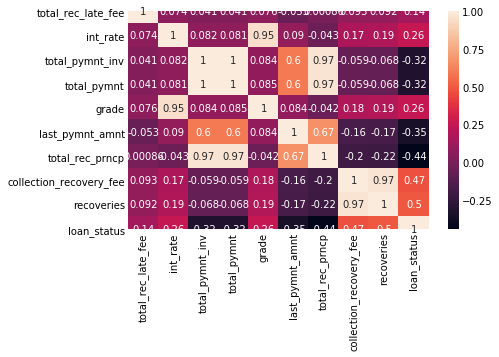

In [32]:
# checking for little or no multicollinearity between good predictor variables
sns.heatmap(X_test_loan.corr(), annot=True)

In [33]:
# feature selection while dealing with multicollinearity
X = int_loan[['total_rec_int', 'mths_since_recent_inq', 'total_rev_hi_lim','revol_util', 'inq_last_6mths','funded_amnt_inv','loan_amnt','funded_amnt',
            'bc_util', 'percent_bc_gt_75', 'num_rev_tl_bal_gt_0','num_actv_rev_tl', 'tot_cur_bal', 'total_bc_limit', 'mort_acc',
            'tot_hi_cred_lim', 'avg_cur_bal', 'bc_open_to_buy','num_tl_op_past_12m', 'dti', 'acc_open_past_24mths', 'total_rec_late_fee',
            'int_rate','total_rec_prncp','recoveries']]   
# Dropped columns as a result of multicollinearity: 'collection_recovery_fee','total_pymnt_inv','total_pymnt','grade','last_pymnt_amnt'
y = int_loan['loan_status']

In [34]:
# values to be scaled later
X.describe() 

,total_rec_int,mths_since_recent_inq,total_rev_hi_lim,revol_util,inq_last_6mths,funded_amnt_inv,loan_amnt,funded_amnt,bc_util,percent_bc_gt_75,...,tot_hi_cred_lim,avg_cur_bal,bc_open_to_buy,num_tl_op_past_12m,dti,acc_open_past_24mths,total_rec_late_fee,int_rate,total_rec_prncp,recoveries
count,391091.000000,391091.000000,3.910910e+05,391091.000000,391091.000000,391091.000000,391091.000000,391091.000000,391091.000000,391091.000000,...,3.910910e+05,391091.000000,391091.000000,391091.000000,391091.000000,391091.000000,3.910910e+05,391091.000000,391091.000000,391091.000000
mean,2389.595285,7.048598,3.227330e+04,51.939313,0.658062,14383.725432,14415.314466,14406.373005,59.959093,45.263582,...,1.740226e+05,13505.694563,10058.320360,2.173096,18.226540,4.687604,1.556729e+00,13.263880,12161.530052,234.968618
std,2592.454542,5.635766,3.257225e+04,24.531583,0.940042,8710.172632,8712.171819,8707.771660,27.824428,35.389946,...,1.739525e+05,15831.185057,14929.346397,1.799216,10.866193,3.124118,1.067662e+01,4.755226,8861.606328,939.759603
min,0.000000,-56.391325,-4.378653e+04,0.000000,0.000000,0.000000,500.000000,500.000000,0.000000,-38.482468,...,0.000000e+00,-47636.540631,-24052.348582,-0.282272,0.000000,0.000000,-2.000000e-10,5.310000,0.000000,0.000000
25%,763.320000,2.000000,1.391610e+04,33.600000,0.000000,7900.000000,8000.000000,8000.000000,39.000000,12.500000,...,5.173850e+04,3239.000000,1494.000000,1.000000,11.760000,2.000000,0.000000e+00,9.750000,5000.000000,0.000000
50%,1564.330000,6.000000,2.390000e+04,52.400000,0.000000,12000.000000,12000.000000,12000.000000,62.912242,44.400000,...,1.246590e+05,8226.000000,4886.000000,2.000000,17.570000,4.000000,0.000000e+00,12.790000,10000.000000,0.000000
75%,3019.675000,10.099594,4.010000e+04,70.800000,1.000000,20000.000000,20000.000000,20000.000000,84.000000,75.000000,...,2.431000e+05,18139.500000,12327.000000,3.000000,24.010000,6.000000,0.000000e+00,15.990000,17125.000000,0.000000
max,27884.800000,75.799945,1.649101e+06,892.300000,8.000000,40000.000000,40000.000000,40000.000000,526.202551,579.009094,...,9.999999e+06,497484.000000,497445.000000,32.000000,999.000000,48.000000,9.298000e+02,30.990000,40000.000000,39859.550000


In [35]:
# splitting data into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

### Logistic Regression 

In [37]:
logreg_model_1 = LogisticRegression()
logreg_model_1.fit(X_train,y_train)
#y_pred_train = logreg_model_1.predict(X_train)
y_pred_test = logreg_model_1.predict(X_test)

In [38]:
metrics.accuracy_score(y_test, y_pred_test)

0.998997678295644

In [39]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[78140,     1],
       [   97, 19535]], dtype=int64)

In [40]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78141
           1       1.00      1.00      1.00     19632

    accuracy                           1.00     97773
   macro avg       1.00      1.00      1.00     97773
weighted avg       1.00      1.00      1.00     97773



In [41]:
y_pred_prob = logreg_model_1.predict_proba(X_test)[:,1]

In [42]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9992272774059915

### Support Vector Machine Classifier

In [43]:
#svm_model_1 = SVC(kernel='linear')
#svm_model_1.fit(X_train,y_train)
#y_pred_train = svm_model_1.predict(X_train)
#y_pred_test = svm_model_1.predict(X_test)

In [44]:
#metrics.accuracy_score(y_test, y_pred_test)

In [45]:
#metrics.confusion_matrix(y_test, y_pred_test)

In [46]:
#print(metrics.classification_report(y_test, y_pred_test))

### RandomForestClassifier

In [47]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_train,y_train)
#y_pred_train = rf_model_1.predict(X_train)
y_pred_test = rf_model_1.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, y_pred_test)

0.995417957922944

In [49]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[78138,     3],
       [  445, 19187]], dtype=int64)

In [50]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     78141
           1       1.00      0.98      0.99     19632

    accuracy                           1.00     97773
   macro avg       1.00      0.99      0.99     97773
weighted avg       1.00      1.00      1.00     97773



In [51]:
y_pred_prob = rf_model_1.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.9987596007330364

## MinMaxScaler
* Scaling features and remodeling

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
mm = MinMaxScaler()
feature_names = X_train.columns
X_train_mm = mm.fit_transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=feature_names)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=feature_names)

In [54]:
# showing a DESC of the normalized X_train features
X_train_mm.describe()


,total_rec_int,mths_since_recent_inq,total_rev_hi_lim,revol_util,inq_last_6mths,funded_amnt_inv,loan_amnt,funded_amnt,bc_util,percent_bc_gt_75,...,tot_hi_cred_lim,avg_cur_bal,bc_open_to_buy,num_tl_op_past_12m,dti,acc_open_past_24mths,total_rec_late_fee,int_rate,total_rec_prncp,recoveries
count,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,...,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000,293318.000000
mean,0.085588,0.479945,0.044890,0.058215,0.082295,0.359388,0.352066,0.351845,0.113981,0.135663,...,0.017427,0.108078,0.061848,0.076098,0.018243,0.097704,0.001674,0.309663,0.303943,0.005890
std,0.092972,0.042641,0.019064,0.027513,0.117670,0.217633,0.220435,0.220334,0.052897,0.057327,...,0.017475,0.029268,0.028712,0.055796,0.010964,0.065095,0.011438,0.185105,0.221461,0.023568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027330,0.441718,0.034105,0.037655,0.000000,0.197002,0.189873,0.189873,0.074306,0.082663,...,0.005176,0.089097,0.045402,0.039721,0.011772,0.041667,0.000000,0.172897,0.125000,0.000000
50%,0.056026,0.471978,0.039924,0.058725,0.000000,0.300000,0.291139,0.291139,0.119726,0.134224,...,0.012486,0.098334,0.051915,0.070697,0.017578,0.083333,0.000000,0.289330,0.250000,0.000000
75%,0.108227,0.503000,0.049552,0.079346,0.125000,0.500000,0.493671,0.493671,0.159824,0.183780,...,0.024346,0.116647,0.066196,0.101674,0.024044,0.125000,0.000000,0.415888,0.427500,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Logistic Regression 

In [55]:
logreg_model_2 = LogisticRegression()
logreg_model_2.fit(X_train_mm,y_train)
#y_pred_train = logreg_model_2.predict(X_train_mm)
y_pred_test = logreg_model_2.predict(X_test_mm)

In [56]:
metrics.accuracy_score(y_test, y_pred_test)

0.9904881715811114

In [57]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[78127,    14],
       [  916, 18716]], dtype=int64)

In [58]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     78141
           1       1.00      0.95      0.98     19632

    accuracy                           0.99     97773
   macro avg       0.99      0.98      0.98     97773
weighted avg       0.99      0.99      0.99     97773



In [59]:
y_pred_prob = logreg_model_2.predict_proba(X_test_mm)[:,1]

In [60]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9985417369570797

### Support Vector Machine Classifier

In [61]:
#svm_model_2 = SVC(kernel='linear')
#svm_model_2.fit(X_train_mm,y_train)
#y_pred_train = svm_model_2.predict(X_train_mm)
#y_pred_test = svm_model_2.predict(X_test_mm)

In [62]:
#metrics.accuracy_score(y_test, y_pred_test)

In [63]:
#metrics.confusion_matrix(y_test, y_pred_test)

In [64]:
#print(metrics.classification_report(y_test, y_pred_test))

### RandomForestClassifier

In [65]:
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(X_train_mm,y_train)
#y_pred_train = rf_model_2.predict(X_train_mm)
y_pred_test = rf_model_2.predict(X_test_mm)

In [66]:
metrics.accuracy_score(y_test, y_pred_test)

0.9960418520450431

In [67]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[78138,     3],
       [  384, 19248]], dtype=int64)

In [68]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78141
           1       1.00      0.98      0.99     19632

    accuracy                           1.00     97773
   macro avg       1.00      0.99      0.99     97773
weighted avg       1.00      1.00      1.00     97773



In [69]:
y_pred_prob = rf_model_2.predict_proba(X_test_mm)[:,1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.9988049166357135

### StandardScaler

In [70]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=feature_names)
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=feature_names)

In [71]:
X_train_sc.describe()

,total_rec_int,mths_since_recent_inq,total_rev_hi_lim,revol_util,inq_last_6mths,funded_amnt_inv,loan_amnt,funded_amnt,bc_util,percent_bc_gt_75,...,tot_hi_cred_lim,avg_cur_bal,bc_open_to_buy,num_tl_op_past_12m,dti,acc_open_past_24mths,total_rec_late_fee,int_rate,total_rec_prncp,recoveries
count,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,...,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05,2.933180e+05
mean,-3.701210e-17,5.978530e-16,-3.457116e-16,-4.971162e-16,3.053184e-15,-6.609218e-16,-4.410744e-16,-2.869472e-16,-1.086332e-16,-6.892476e-16,...,1.358238e-16,3.307573e-16,1.058413e-16,-1.640535e-16,3.144518e-16,-3.789752e-16,8.136936e-15,7.061707e-16,1.407266e-15,-3.813436e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-9.205741e-01,-1.125543e+01,-2.354718e+00,-2.115922e+00,-6.993685e-01,-1.651352e+00,-1.597143e+00,-1.596876e+00,-2.154781e+00,-2.366496e+00,...,-9.972202e-01,-3.692712e+00,-2.154073e+00,-1.363863e+00,-1.663847e+00,-1.500951e+00,-1.463648e-01,-1.672911e+00,-1.372447e+00,-2.499192e-01
25%,-6.266142e-01,-8.964707e-01,-5.657043e-01,-7.472734e-01,-6.993685e-01,-7.461467e-01,-7.357845e-01,-7.351210e-01,-7.500416e-01,-9.245303e-01,...,-7.010160e-01,-6.485209e-01,-5.728062e-01,-6.519670e-01,-5.901931e-01,-8.608603e-01,-1.463648e-01,-7.388587e-01,-8.080128e-01,-2.499192e-01
50%,-3.179639e-01,-1.868477e-01,-2.604941e-01,1.851786e-02,-6.993685e-01,-2.728832e-01,-2.763934e-01,-2.755184e-01,1.086098e-01,-2.509078e-02,...,-2.827291e-01,-3.329124e-01,-3.459544e-01,-9.678416e-02,-6.067008e-02,-2.207700e-01,-1.463648e-01,-1.098456e-01,-2.435781e-01,-2.499192e-01
75%,2.435037e-01,5.406825e-01,2.445747e-01,7.680157e-01,3.629250e-01,6.460963e-01,6.423890e-01,6.436869e-01,8.666660e-01,8.393503e-01,...,3.959604e-01,2.927631e-01,1.514402e-01,4.583986e-01,5.291090e-01,4.193203e-01,-1.463648e-01,5.738642e-01,5.579190e-01,-2.499192e-01
max,9.835355e+00,1.219606e+01,5.010078e+01,3.423065e+01,7.798979e+00,2.943545e+00,2.939345e+00,2.941700e+00,1.675001e+01,1.507746e+01,...,5.622592e+01,3.047437e+01,3.267432e+01,1.655870e+01,8.954192e+01,1.386122e+01,8.727897e+01,3.729448e+00,3.143030e+00,4.218017e+01


### Logistic Regression 

In [72]:
logreg_model_3 = LogisticRegression()
logreg_model_3.fit(X_train_sc,y_train)
#y_pred_train = logreg_model_3.predict(X_train_sc)
y_pred_test = logreg_model_3.predict(X_test_sc)

In [73]:
logreg_model_3 = LogisticRegression()
logreg_model_3.fit(X_train_sc,y_train)
#y_pred_train = logreg_model_3.predict(X_train_sc)
y_pred_test = logreg_model_3.predict(X_test_sc)

In [74]:
metrics.accuracy_score(y_test, y_pred_test)

0.9968703016170108

In [75]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[78135,     6],
       [  300, 19332]], dtype=int64)

In [76]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78141
           1       1.00      0.98      0.99     19632

    accuracy                           1.00     97773
   macro avg       1.00      0.99      1.00     97773
weighted avg       1.00      1.00      1.00     97773



In [77]:
y_pred_prob = logreg_model_3.predict_proba(X_test_sc)[:,1]

In [78]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9995606617776089

### Support Vector Machine Classifier

In [79]:
#svm_model_3 = SVC(kernel='linear')
#svm_model_3.fit(X_train_mm,y_train)
#y_pred_train = svm_model_3.predict(X_train_sc)
#y_pred_test = svm_model_3.predict(X_test_sc)

In [80]:
#metrics.accuracy_score(y_test, y_pred_test)

In [81]:
#metrics.confusion_matrix(y_test, y_pred_test)

In [82]:
#print(metrics.classification_report(y_test, y_pred_test))

### RandomForestClassifier

In [83]:
rf_model_3 = RandomForestClassifier()
rf_model_3.fit(X_train_sc,y_train)
#y_pred_train = rf_model_3.predict(X_train_sc)
y_pred_test = rf_model_3.predict(X_test_sc)

In [84]:
metrics.accuracy_score(y_test, y_pred_test)

0.9958168410501876

In [85]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[78140,     1],
       [  408, 19224]], dtype=int64)

In [86]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     78141
           1       1.00      0.98      0.99     19632

    accuracy                           1.00     97773
   macro avg       1.00      0.99      0.99     97773
weighted avg       1.00      1.00      1.00     97773



In [87]:
y_pred_prob = rf_model_3.predict_proba(X_test_sc)[:,1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.9990282016322927